# Exploring Tweet Sentiment Analysis

## 1. Business Understanding
#### Introduction
Unlocking the power of sentiment analysis within the realm of customer feedback on Twitter is a pivotal step towards enhancing corporate growth, informed decision-making, and profit optimization. In this project, we embark to delve deep into the Twitter customers' sentiment concealed within user-generated feedback directed at companies. Will achieve this through utilizing Natural Language Processing (NLP) techniques, aimed at unraveling the sentiment spectrum and its profound implications for businesses. Will use data from dataworld.

#### Main Objective
- Build a robust sentiment analysis model to rate the sentiment of tweets based on their content.

#### Overview
In this project, we aim to create a multiclass classifier for sentiment analysis of tweets. Our primary objective is to understand and rate the sentiment of tweets, categorizing them into three classes: positive, neutral, and negative. This analysis will enable businesses and individuals to gauge public sentiment, monitor brand perception, and make informed decisions.

#### Experimental Design
- Data understanding - importing necessary libraries, loading the data and get general understanding of the dataset.
- Data Preprocessing - treat the data, clean it and structure the tweet data to be ready for analysis.
- EDA / Visualizations - Create visuals, graphs to enhance understanding of the data.
- Model building - Use deep learning models to construct a sentiment model.
- Model evaluation - asses the models perfomance using relevant metrics in this project will use accuracy.

## 2. Data Understanding
#### Importing Libraries

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder

import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Conv1D, GlobalMaxPooling1D, Dropout, GlobalAveragePooling1D
from keras.constraints import max_norm
from keras.callbacks import EarlyStopping
from wordcloud import WordCloud


#### Reading data

In [2]:
# Load the dataset
df = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding='ISO-8859-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


- The data is best to use in sentiment analysis since it contains real tweets with availability of the use names and the emotions column already identifying the emotion conveyed.
- However, the column names in the dataset may pose challenges during the project. To enhance clarity and ease of navigation, we will proceed to rename these columns.

In [3]:
# Rename the columns
df.rename({"emotion_in_tweet_is_directed_at": 'brand', "is_there_an_emotion_directed_at_a_brand_or_product":'sentiment'}, axis=1, inplace=True)
df.head(2)

,tweet_text,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion


Let's gain a comprehensive overview of the dataset, including its shape, presence of missing values, data types, and other relevant characteristics.

In [4]:
# Check the data shape and missing values
def understand_data(data):
    print(f"Data shape: {data.shape}\n")
    print('========================================')
    print(f'Data information: {data.info()}\n')
    print('========================================')
    print(f"Missing values:\n{data.isnull().sum()}")

understand_data(df)


Data shape: (9093, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  9092 non-null   object
 1   brand       3291 non-null   object
 2   sentiment   9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
Data information: None

Missing values:
tweet_text       1
brand         5802
sentiment        0
dtype: int64


- The dataset comprises 9093 rows and 3 columns.
- The data type of the "tweet_text" column is currently 'object'; we will convert it to 'str' to facilitate preprocessing. Will also drop the one row with missing value.
- Despite a significant number of missing values in the "brand" column, it won't impact our project, so we will proceed to drop this column.

In [5]:
# Drop rows with missing tweet_text
df.dropna(subset=['tweet_text'], inplace=True)

* Visualize the distribution of sentiment classes to understand the balance of the dataset.


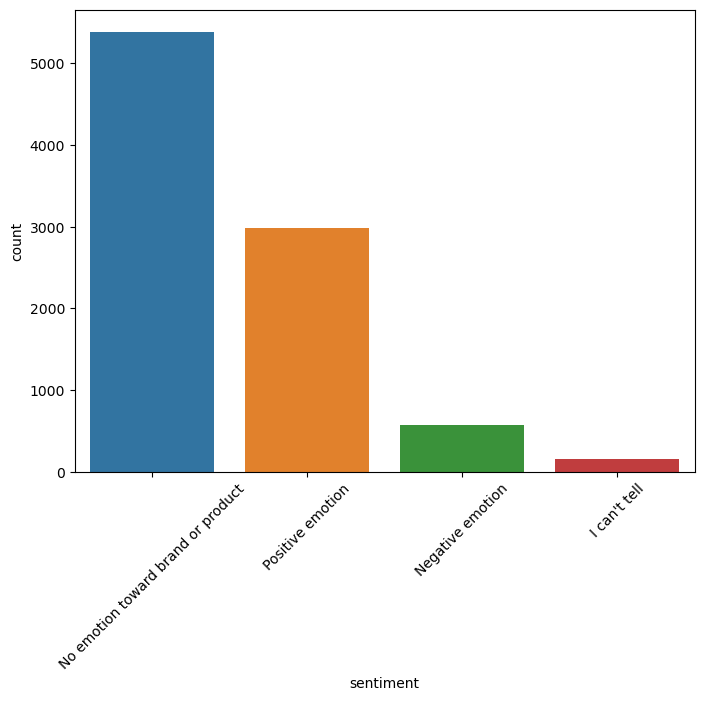

In [6]:
# Check the distribution of sentiment
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
plt.xticks(rotation=45);

Majority of sentiments have no emotion towards the brand/product, even the lowest sentiment are I can't tell. Therefore, we will treat these sentiments as neutral and proceed to rename them accordingly.

In [7]:
mapping = {"No emotion toward brand or product" : "Neutral",
         "I can't tell" :  "Neutral",
           "Negative emotion":"Negative",
          "Positive emotion" : "Positive"}

df['sentiment'] = df.sentiment.replace(mapping)

Visualize the distribution of sentiment categories to understand the balance of sentiments in the dataset.

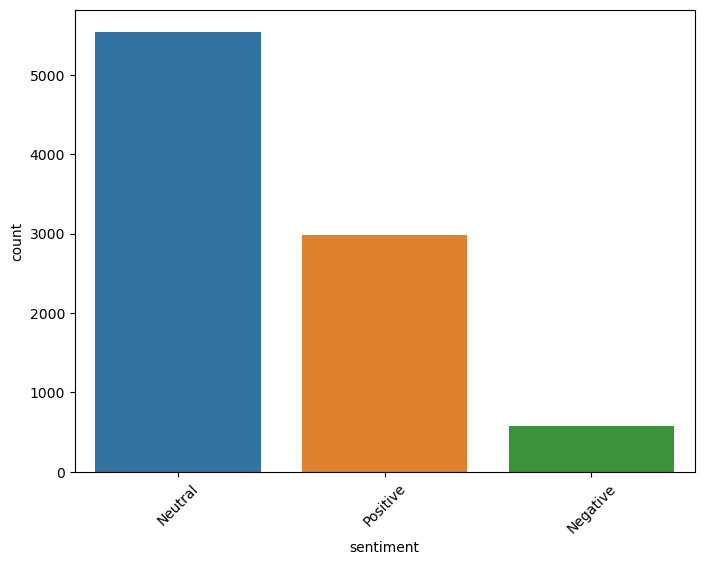

In [8]:
# Check the distribution of sentiment
plt.figure(figsize=(8,6))
sns.countplot(x='sentiment', data=df, order=df['sentiment'].value_counts().index)
plt.xticks(rotation=45);

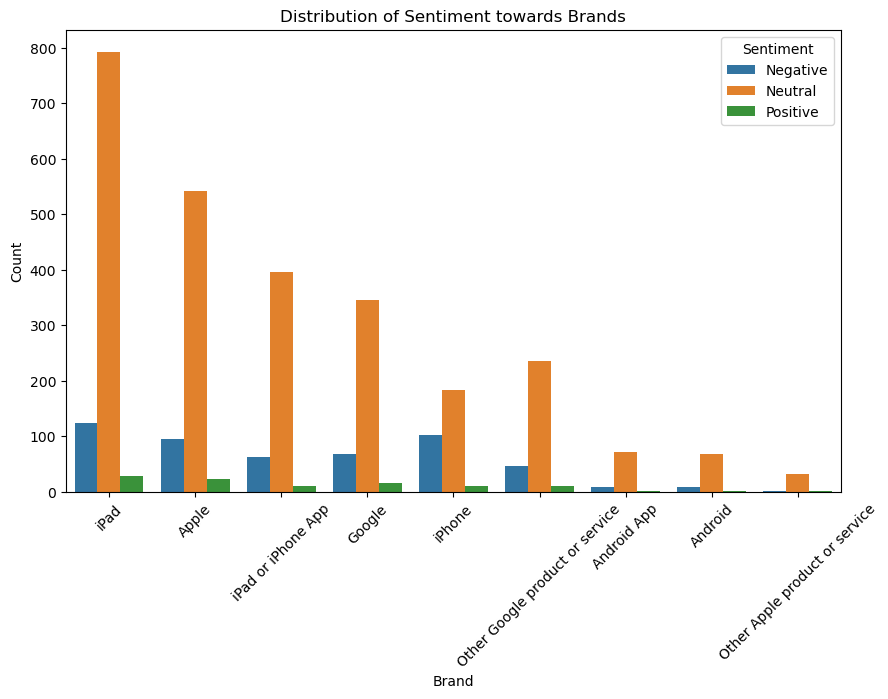

In [10]:
# Create a countplot to show the distribution of sentiment towards brands
plt.figure(figsize=(10, 6))
sns.countplot(x='brand', hue='sentiment', data=df, order=df['brand'].value_counts().index)
plt.title('Distribution of Sentiment towards Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right', labels=['Negative', 'Neutral', 'Positive'])

plt.show()

- The "iPad" brand has garnered the highest volume of feedback, with a predominant sentiment leaning towards neutrality.
- As part of our data preprocessing, we will proceed to drop the "brand" column from the dataset.

In [11]:
# Drop the brand column
df.drop('brand', axis=1, inplace=True)

To prepare the text data for analysis and understand the most common words used in tweets, we'll perform text preprocessing using CountVectorizer, followed by visualization of the top 30 frequently occurring words.

Text(0.5, 1.0, 'Most Frequently Occurring Words - Top 30')

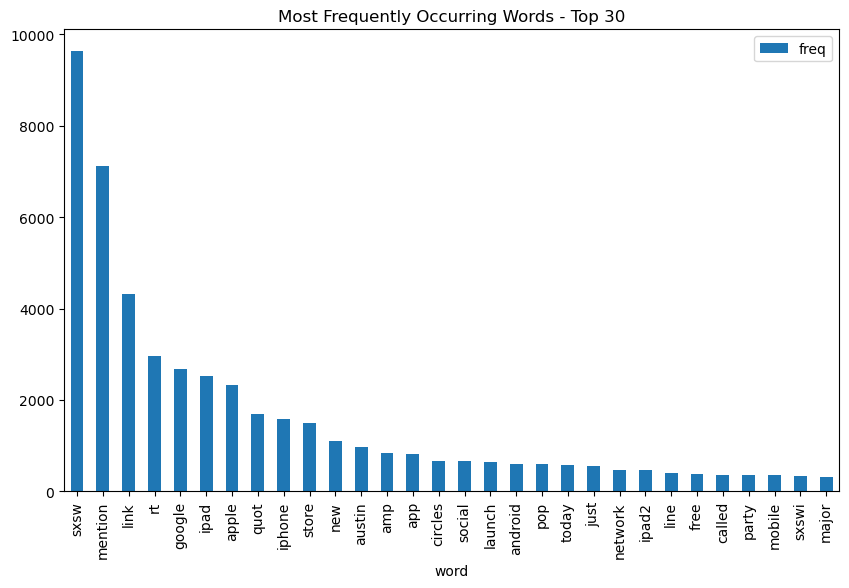

In [12]:
# Text preprocessing using CountVectorizer
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(df['tweet_text'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plot the most frequently occurring words
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(10, 6))
plt.title("Most Frequently Occurring Words - Top 30")

To visually explore the most prominent words in our dataset, we'll create a WordCloud using word frequencies obtained from the text data.

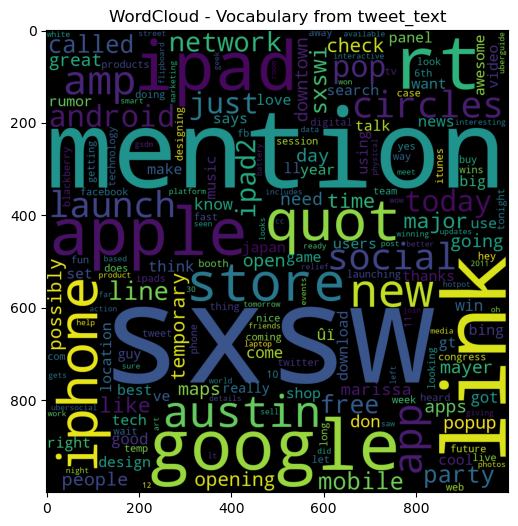

In [15]:
# WordCloud for visualization
wordcloud = WordCloud(background_color='black', width=1000, height=1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from tweet_text");

In [16]:
# Make copy of the orriginal
data = df.copy()

## 3. Data Preprocessing

- Data preprocessing enables us to cleanse the tweet_text data, effectively removing any inconsistencies, special characters, irrelevant information that might hinder our analysis. Additionaly will transform the raw text to a more structures and managable format. Thid helps in standardizing the text and make it amenable to various NLP techniques.
- We will define a function to preprocess the tweet_text then store the processed tweets in a new column clean_tweet. This will be easy to do tokenization later on and to give each word a unique number.
- **Note:** At the step of removing stopwords we wont remove 'not', since its sentiment analysis the word 'not' might be of key in analysing the sentiment of the tweet.

In [17]:
# Data Preprocessing
# Clean and preprocess the tweet_text
def preprocessing_text(text):
    # Remove mentions, URLs, and links
    text = re.sub(r'@[\w]*|http\S+|www\S+https\S+', " ", text)
    
    # Remove special characters except '#'
    text = re.sub(r'[^a-zA-Z#]', " ", text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Initialize the Porter Stemmer
    stemmer = PorterStemmer()
    
    # Apply stemming to each token (stemming is optional)
    stemmed_words = [stemmer.stem(word) for word in tokens]
    
    # Get English stopwords
    stop_words = set(stopwords.words('english'))
    # Since 'not' might be an important word in sentiment analysis we will not remove it as a stopword
    stop_words.remove('not')
    
    # Remove stopwords from tokens
    filtered_text = [word for word in tokens if word not in stop_words]
    
    # Filter out words with a length less than 3 characters
    clean_text = [word for word in filtered_text if len(word) > 2]
    
    # Join the cleaned tokens back into a single string
    text = ' '.join(clean_text)
    
    return text

# Apply the preprocessing_text function to the 'tweet_text' column
data['clean_tweet'] = df['tweet_text'].astype(str).apply(preprocessing_text)


In [18]:
# Check the original tweet
df['tweet_text'].iloc[0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [19]:
# Compare with the processed data
data['clean_tweet'].iloc[0]

'iphone hrs tweeting rise austin dead need upgrade plugin stations sxsw'

- The defined function successfully removed the patterns i.e the username, any link and url, short words e.t.c. It worked as it was supposed to.
- Therefore, our clean_tweet is ready to be prepared for modelling.

Text(0.5, 1.0, 'Most Frequently Occurring Words - Top 30')

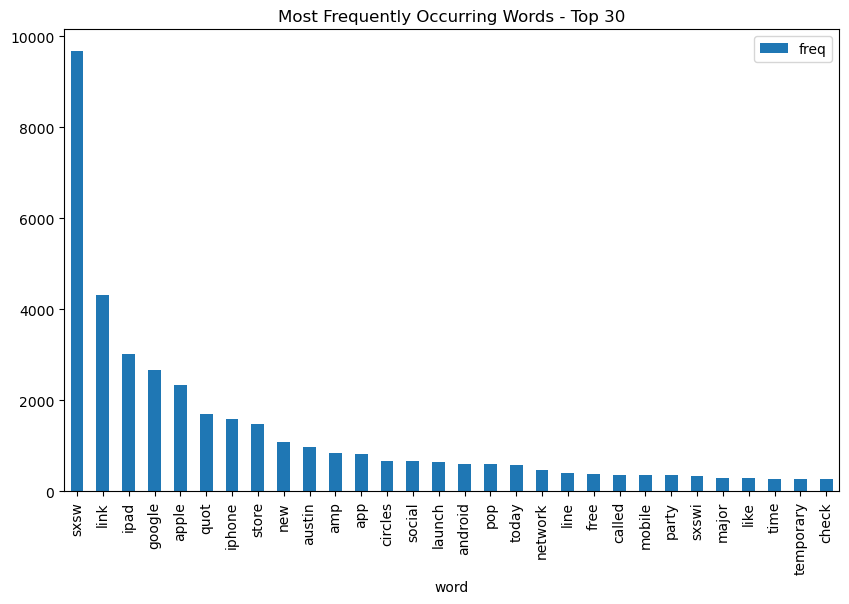

In [20]:
# Text preprocessing using CountVectorizer
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data['clean_tweet'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

# Plot the most frequently occurring words
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(10, 6),)
plt.title("Most Frequently Occurring Words - Top 30")

**Preparing our clean data for modelling**
- Since NLP is the processing of converting human text to computer binary, we will need to convert the clean_tweet and the sentiment column to numeric numbers that will be understood by computer.
- Convert the clean_tweet into a sequence of integers using the tokenizer. This creates a dictionary of the unique words present in the clean_tweet text and maps each word to a unique integer value. 
- Use the pad_sequences function from Keras to ensure that all review sequences have the same length.

In [21]:
# Initialize a tokenizer with a maximum vocabulary size of 5000 words and a special token for out-of-vocabulary words.
tokenizer = Tokenizer(num_words=1000, oov_token='<OOV>')

# Fit the tokenizer on the preprocessed 'clean_tweet' column to build the vocabulary.
tokenizer.fit_on_texts(data['clean_tweet'])

# Retrieve the word-to-index mapping from the tokenizer.
word_index = tokenizer.word_index

# Convert the text data into numerical sequences using the tokenizer.
sequences = tokenizer.texts_to_sequences(data['clean_tweet'])

# Pad the sequences to a fixed length of 100, truncating any exceeding text ('post' truncation).
padded_sequences = pad_sequences(sequences, maxlen=100, truncating='post')

In preparation for our sentiment analysis model, we'll transform the categorical sentiment column into numerical format. We will hot encoded the sentiment categories that will be key in facilitating model training and evaluation.

In [22]:
sentiment_labels = pd.get_dummies(df['sentiment']).values

## 4. Modelling
- We will build two models and tune them to improve perfomance;
1. Neural Network model
- A RNN is a special type of neural network that processed one word at a time while maintaining an internal memory of what it's already seen.
- This allows it to treat words differently based on their order in a sentence and to slowly build an understanding of the entire input, one word at a time.
- In a simple RNN layer input from previous timestamps gradually disappeared as we got further through the input
2. LSTM {Long Short Term Memory}
- But with LSTM it has a long-term memory data structure storing all the previously seen inputs as well as when it saw them. This allows it to access any previous value needed at any point in time. This adds to the complexity of our network and allows it to discover more useful relationships between inputs and when they appear.

#### Data splitting
Will use scikit-learn to randomly split the dataset into training and testing sets. WIll then use the training set to train the model to classify the sentiments of the reviews. And use the test set to access how good the model is at classifying new unseen reviews.

In [26]:
# Split data to train and test split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiment_labels, test_size=0.2, random_state=42)

#### A. Building Neural Network Model
Will build a neural network model with six layers.
- The first layer of the neural network is an Embedding layer. This layer learns a dense representation of words in the vocabulary. 
- The second layer is a Conv1D layer with 64 filters and a kernel size of 5. This layer performs convolution operations on the input sequences, using a small sliding window of size 5.
- The third layer reduces the sequence of feature maps to a single vector. It takes the maximum value over each feature map. 
- The fourth layer performs a linear transformation on the input vector. 
- The fifth layer randomly sets a fraction of the input units to 0 during training. This helps prevent overfitting. 
- The final layer converts the output to a probability distribution over the three possible classes: positive, neutral, and negative.

In [27]:
# Initialize a Sequential model for sentiment analysis.
model = Sequential()

# Add an embedding layer with a vocabulary size of 5000, embedding dimension of 100, and input length of 100 tokens.
model.add(Embedding(1000, 100, input_length=100))

# Add a 1D convolutional layer with 64 filters and a kernel size of 5, using ReLU activation.
model.add(Conv1D(64, 5, activation='relu'))

# Apply global max-pooling to reduce dimensionality.
model.add(GlobalMaxPooling1D())

# Add a dense layer with 32 units and ReLU activation.
model.add(Dense(32, activation='relu'))

# Apply dropout with a rate of 0.5 to prevent overfitting.
model.add(Dropout(0.5))

# Add the output layer with 3 units (for sentiment classes) and softmax activation.
model.add(Dense(3, activation='softmax'))

# Compile the model with the Adam optimizer, categorical crossentropy loss, and accuracy metric.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display a summary of the model architecture.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 embedding_2 (Embedding)     (None, 100, 100)          100000    
                                                                 
 conv1d_2 (Conv1D)           (None, 96, 64)            32064     
                                                                 
 global_max_pooling1d_2 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 99        
                                                                 
Total params: 134243 (524.39 KB)
Trainable params: 134243 (524.39 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________

**Training the neural network model**
- Fit the training and testing sets to the model. Train the model for ten epochs. After each epoch, the model's performance on the testing set is evaluated.
- To avoid overfitting we will use earlystopping.

In [28]:
history_base = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10
228/228 [==============================] - 4s 15ms/step - loss: 0.8433 - accuracy: 0.6182 - val_loss: 0.7851 - val_accuracy: 0.6344
Epoch 2/10
228/228 [==============================] - 3s 13ms/step - loss: 0.7271 - accuracy: 0.6890 - val_loss: 0.7383 - val_accuracy: 0.6685
Epoch 3/10
228/228 [==============================] - 2s 11ms/step - loss: 0.6468 - accuracy: 0.7356 - val_loss: 0.7513 - val_accuracy: 0.6619
Epoch 4/10
228/228 [==============================] - 3s 13ms/step - loss: 0.5523 - accuracy: 0.7685 - val_loss: 0.7787 - val_accuracy: 0.6701
Epoch 5/10
228/228 [==============================] - 3s 12ms/step - loss: 0.4750 - accuracy: 0.8048 - val_loss: 0.8129 - val_accuracy: 0.6586


In [29]:
# Evaluating the model
y_pred = np.argmax(model.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))

57/57 [==============================] - 0s 4ms/step
Accuracy: 0.6586036283672347


/tmp/ipykernel_12632/3494611464.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(0.0, 0.8616706565022468)

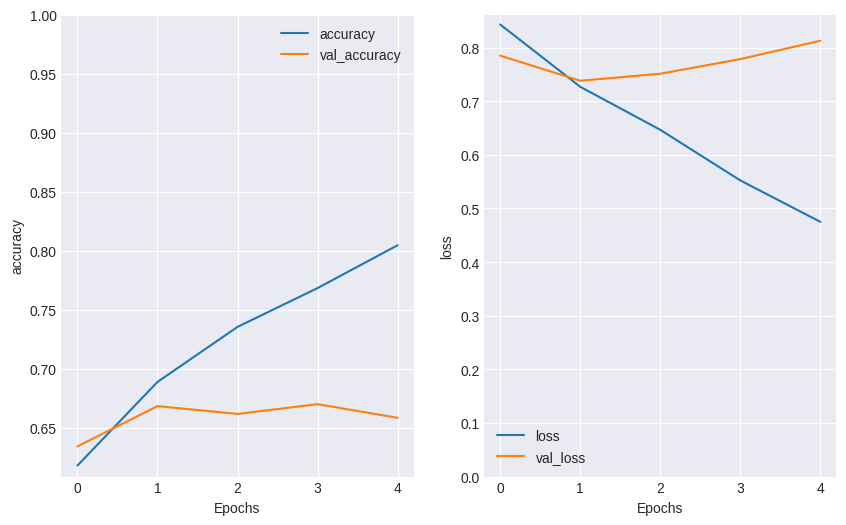

In [30]:
# Plotting the training history of the Baseline Model
plt.style.use('seaborn-darkgrid')

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_graphs(history_base, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_base, 'loss')
plt.ylim(0, None)

**Observation**
- The Neural network model performs well with the training accuracy of 89.59% but a testing accurcy of 65.69%, but suffers from overfitting.
- We will try to do regularization to treat this overfitting.

**Baseline Model Tuning**
- WIll use L2 regularization wchich can handle variable-length inputs, this will make the model better at handling overfitting and diverse text sequences

In [31]:
# Handling overfitting using regularization
regularize = tf.keras.regularizers.l2(0.001)

model_r = Sequential()
model_r.add(Embedding(1000, 128, input_length=X_train.shape[1]))
model_r.add(Dropout(0.3))
model_r.add(GlobalAveragePooling1D())
model_r.add(Dense(8, activation='relu', kernel_regularizer=regularize))
model_r.add(Dropout(0.3))
model_r.add(Dense(3, activation='softmax'))

# Compiling the model
model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# Fitting the Regularized Model
history_r = model_r.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
                         callbacks=[EarlyStopping(monitor='val_loss', patience=3)])


Epoch 1/10


228/228 [==============================] - 3s 9ms/step - loss: 0.9854 - accuracy: 0.6059 - val_loss: 0.8801 - val_accuracy: 0.6003
Epoch 2/10
228/228 [==============================] - 2s 7ms/step - loss: 0.8952 - accuracy: 0.6121 - val_loss: 0.8665 - val_accuracy: 0.6003
Epoch 3/10
228/228 [==============================] - 2s 7ms/step - loss: 0.8732 - accuracy: 0.6121 - val_loss: 0.8569 - val_accuracy: 0.6003
Epoch 4/10
228/228 [==============================] - 2s 7ms/step - loss: 0.8561 - accuracy: 0.6121 - val_loss: 0.8470 - val_accuracy: 0.6003
Epoch 5/10
228/228 [==============================] - 2s 7ms/step - loss: 0.8432 - accuracy: 0.6121 - val_loss: 0.8381 - val_accuracy: 0.6003
Epoch 6/10
228/228 [==============================] - 2s 10ms/step - loss: 0.8350 - accuracy: 0.6121 - val_loss: 0.8316 - val_accuracy: 0.6003
Epoch 7/10
228/228 [==============================] - 3s 11ms/step - loss: 0.8186 - accuracy: 0.6121 - val_loss: 0.8235 - val_accuracy: 0.6003
Epoch 8/10
228/

In [33]:
# Scoring the Regularized Model on test data
# Evaluating the model
y_pred = np.argmax(model_r.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))

57/57 [==============================] - 0s 2ms/step
Accuracy: 0.600329851566795


/tmp/ipykernel_12632/375934681.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(0.0, 0.9946102648973465)

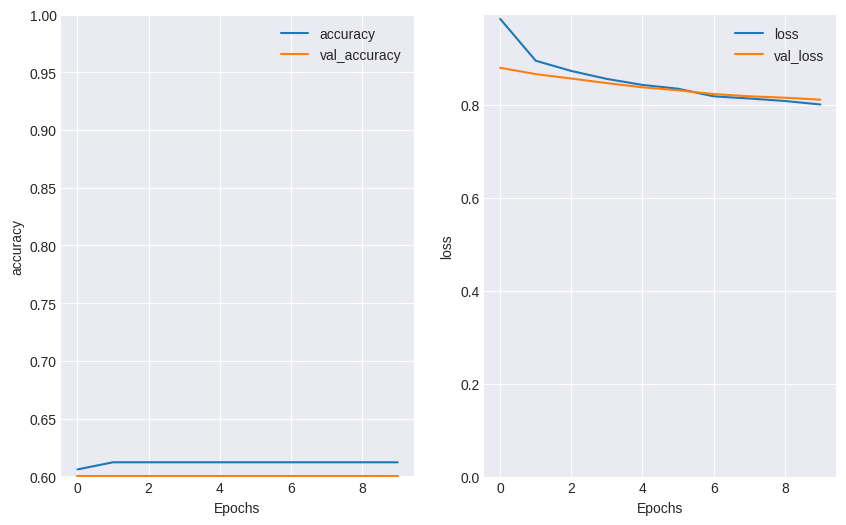

In [34]:
# Plotting the training history of the Baseline Model
plt.style.use('seaborn-darkgrid')

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_graphs(history_r, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_r, 'loss')
plt.ylim(0, None)

22/57 [==========>...................] - ETA: 0s

57/57 [==============================] - 0s 3ms/step


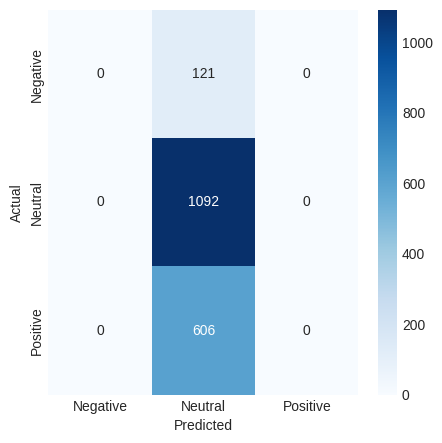

In [35]:
# Confusion Matrix for Regularized Model
y_pred = model_r.predict(X_test)
y_predicted_labels = np.array([np.argmax(i) for i in y_pred])
y_test_labels = np.array([np.argmax(i) for i in y_test])

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_labels, y_predicted_labels)

import seaborn as sn
labels = ['Negative', 'Neutral', 'Positive']
plt.figure(figsize=(5, 5))
sn.heatmap(cm, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

- It handles overfitting so well but reduces the perfomance of the baseline model by having training accuracy of 62% and a testing accuracy of 61%

#### B. LSTM Model

In [36]:
# LSTM Model
model1 = Sequential([
    Embedding(10000, 128, input_length=X_train.shape[1]),
    Dropout(0.3),
    LSTM(32, kernel_constraint=max_norm(3)),
    Dense(32, activation='relu', kernel_regularizer=regularize),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compiling the LSTM Model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# Fitting the LSTM Model
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test),
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10


228/228 [==============================] - 17s 62ms/step - loss: 0.8615 - accuracy: 0.6123 - val_loss: 0.8218 - val_accuracy: 0.6295
Epoch 2/10
228/228 [==============================] - 13s 55ms/step - loss: 0.7308 - accuracy: 0.6754 - val_loss: 0.7631 - val_accuracy: 0.6504
Epoch 3/10
228/228 [==============================] - 11s 49ms/step - loss: 0.6652 - accuracy: 0.7047 - val_loss: 0.7692 - val_accuracy: 0.6630
Epoch 4/10
228/228 [==============================] - 11s 48ms/step - loss: 0.6307 - accuracy: 0.7359 - val_loss: 0.7536 - val_accuracy: 0.6520
Epoch 5/10
228/228 [==============================] - 9s 40ms/step - loss: 0.5916 - accuracy: 0.7511 - val_loss: 0.7822 - val_accuracy: 0.6581
Epoch 6/10
228/228 [==============================] - 9s 39ms/step - loss: 0.5688 - accuracy: 0.7643 - val_loss: 0.8207 - val_accuracy: 0.6234
Epoch 7/10
228/228 [==============================] - 12s 53ms/step - loss: 0.5549 - accuracy: 0.7683 - val_loss: 0.8095 - val_accuracy: 0.6399


In [38]:
# Evaluating the model
y_pred = np.argmax(model1.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))

57/57 [==============================] - 1s 13ms/step
Accuracy: 0.639912039582188


/tmp/ipykernel_12632/3576658580.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(0.0, 0.8768444061279297)

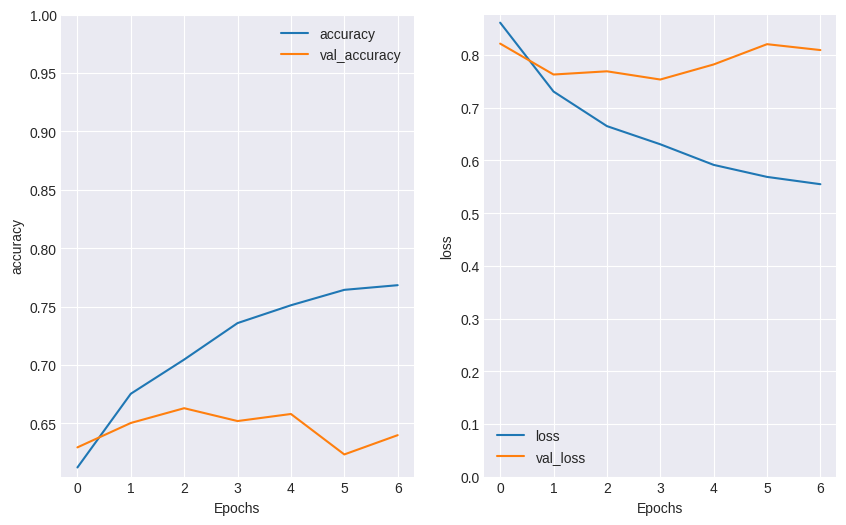

In [39]:
# Plotting the the LSTM model
plt.style.use('seaborn-darkgrid')

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_graphs(history1, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history1, 'loss')
plt.ylim(0, None)

 1/57 [..............................] - ETA: 1s

57/57 [==============================] - 1s 10ms/step


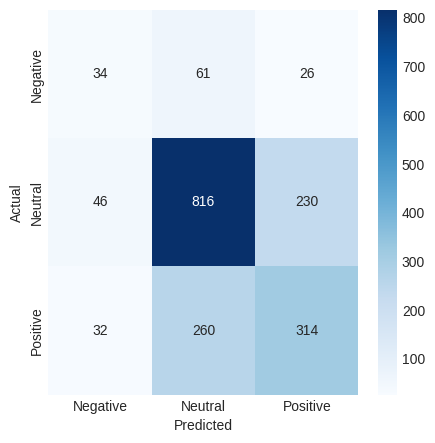

In [40]:
# Confusion Matrix for LSTM Model
y_pred = model1.predict(X_test)
y_predicted_labels = np.array([np.argmax(i) for i in y_pred])
y_test_labels = np.array([np.argmax(i) for i in y_test])

cm = confusion_matrix(y_test_labels, y_predicted_labels)

labels = ['Negative', 'Neutral', 'Positive']
plt.figure(figsize=(5, 5))
sn.heatmap(cm, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Observation**
- The LSTM model suffers overfitting too. Training accuracy is 75% as the testing accuracy is 64%, will try to tune and see if there is an improvement.

**Tuned LSTM**

In [41]:
# Tuned Bidirectional LSTM Model
model2 = Sequential([
    Embedding(10000, 128, input_length=X_train.shape[1]),
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])

# Compiling the Model
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
# Fitting the Tuned Bidirectional LSTM Model
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), 
                      callbacks=[EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/10


228/228 [==============================] - 70s 273ms/step - loss: 0.8459 - accuracy: 0.6092 - val_loss: 0.7882 - val_accuracy: 0.6361
Epoch 2/10
228/228 [==============================] - 58s 253ms/step - loss: 0.7186 - accuracy: 0.6854 - val_loss: 0.7526 - val_accuracy: 0.6597
Epoch 3/10
228/228 [==============================] - 55s 241ms/step - loss: 0.6562 - accuracy: 0.7201 - val_loss: 0.7542 - val_accuracy: 0.6537
Epoch 4/10
228/228 [==============================] - 55s 243ms/step - loss: 0.6109 - accuracy: 0.7397 - val_loss: 0.7778 - val_accuracy: 0.6394
Epoch 5/10
228/228 [==============================] - 56s 244ms/step - loss: 0.5729 - accuracy: 0.7546 - val_loss: 0.8316 - val_accuracy: 0.6328


In [43]:
# Evaluating the model
y_pred = np.argmax(model2.predict(X_test), axis=-1)
print("Accuracy:", accuracy_score(np.argmax(y_test, axis=-1), y_pred))

57/57 [==============================] - 5s 65ms/step
Accuracy: 0.6327652556349642


/tmp/ipykernel_12632/866271060.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


(0.0, 0.859544163942337)

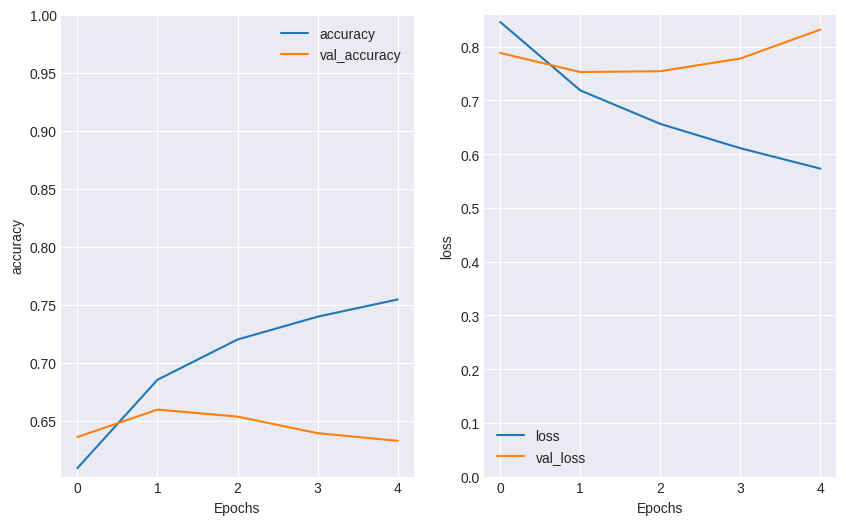

In [44]:
# Plotting the training history of the Baseline Model
plt.style.use('seaborn-darkgrid')

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plot_graphs(history2, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history2, 'loss')
plt.ylim(0, None)

57/57 [==============================] - 4s 69ms/step


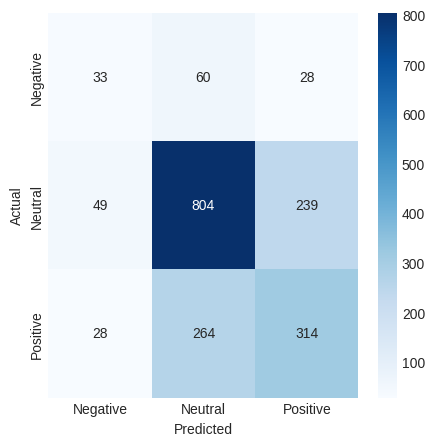

In [45]:
# Confusion Matrix for the Tuned Bidirectional LSTM Model
y_pred = model2.predict(X_test)
y_predicted_labels = np.array([np.argmax(i) for i in y_pred])
y_test_labels = np.array([np.argmax(i) for i in y_test])

cm = confusion_matrix(y_test_labels, y_predicted_labels)

labels = ['Negative', 'Neutral', 'Positive']
plt.figure(figsize=(5, 5))
sn.heatmap(cm, xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

**Observation**
- The Tune LSTM model improves but still suffers overfitting too. Training accuracy is 76% as the testing accuracy is 66%, however it's fairly better.

**Choosing the best model**

In [46]:
# Define a function to evaluate a model
def evaluate_model(model, model_name):
    # Evaluating the model
    y_pred = np.argmax(model.predict(X_test), axis=-1)
    accuracy = accuracy_score(np.argmax(y_test, axis=-1), y_pred)
    print(f"{model_name} Accuracy: {accuracy:.4f}")

# Evaluate each model
evaluate_model(model, "Baseline Model")
evaluate_model(model_r, "Regularized Model")
evaluate_model(model1, "LSTM Model")
evaluate_model(model2, "Tuned Bidirectional LSTM Model")


57/57 [==============================] - 0s 4ms/step
Baseline Model Accuracy: 0.6586
57/57 [==============================] - 0s 2ms/step
Regularized Model Accuracy: 0.6003
57/57 [==============================] - 0s 8ms/step
LSTM Model Accuracy: 0.6399
57/57 [==============================] - 4s 75ms/step
Tuned Bidirectional LSTM Model Accuracy: 0.6328


**Observation**
-  The tuned Bidirectional LSTM model is our best model.
-  Will visualize the perfomance of each model's training and testing loss and accuracy.

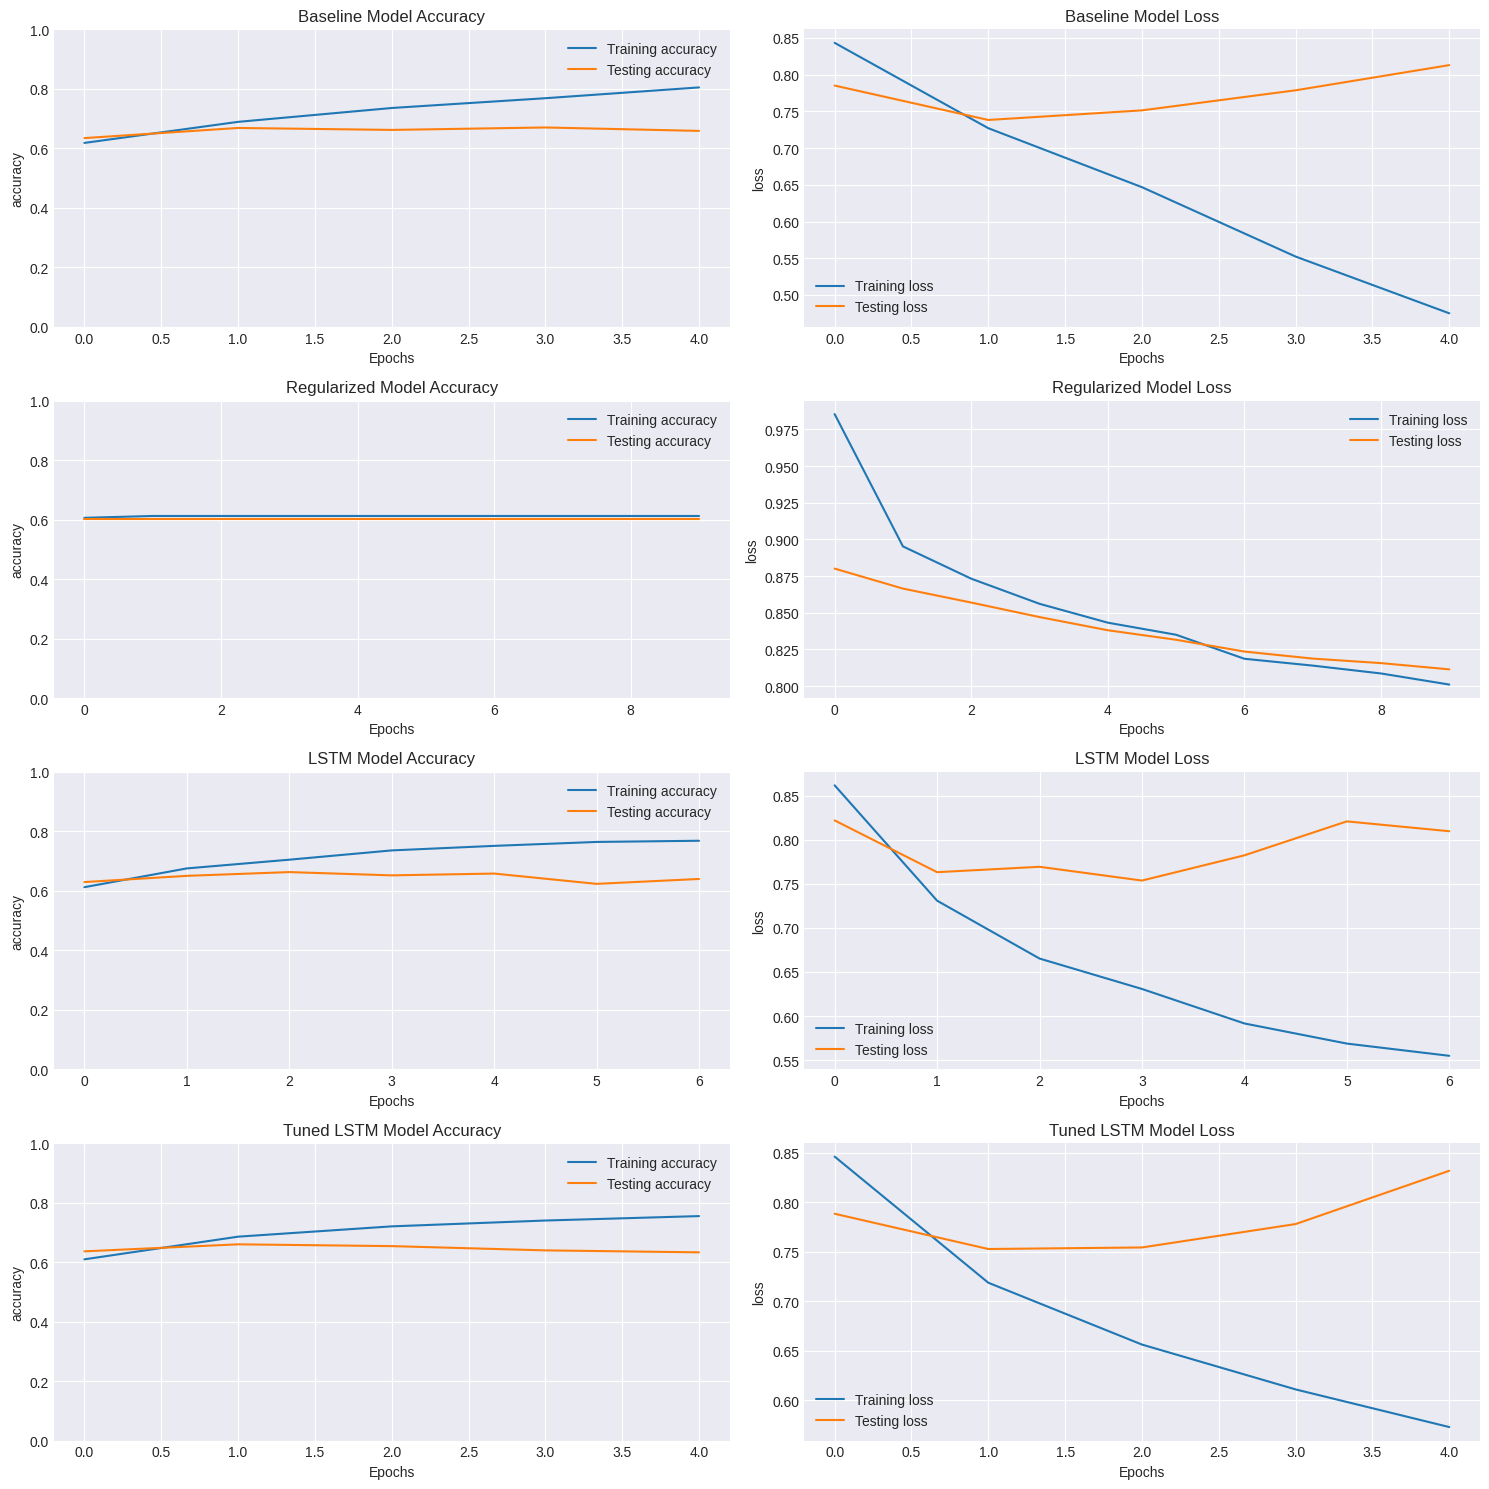

In [47]:
# Define a function to plot training and testing metrics
def plot_training_vs_testing_metrics(history, metric):
    plt.plot(history.history[metric], label=f'Training {metric}')
    plt.plot(history.history['val_' + metric], label=f'Testing {metric}')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend()

# Create a figure for plotting
plt.figure(figsize=(15, 15))

# Plot training vs. testing metrics for each model
models = [
    ('Baseline Model', history_base),
    ('Regularized Model', history_r),
    ('LSTM Model', history1),
    ('Tuned LSTM Model', history2)
]

for i, (model_name, model_history) in enumerate(models, start=1):
    plt.subplot(4, 2, 2 * i - 1)
    plot_training_vs_testing_metrics(model_history, 'accuracy')
    plt.ylim(0, 1)
    plt.title(f'{model_name} Accuracy')

    plt.subplot(4, 2, 2 * i)
    plot_training_vs_testing_metrics(model_history, 'loss')
    plt.title(f'{model_name} Loss')

plt.tight_layout()
plt.show()


## 5. Conclusion
- In this project, we explored various models for sentiment analysis on text data. We started with a baseline model using a neural network (NN) to preserve sequence information in text data.
- We then experimented with more advanced models, including LSTM and Tuned Bidirectional LSTM, in an effort to improve accuracy. While the latter showed promise with better accuracy, it exhibited overfitting issues.
- Based on our findings, tuned LSTM appears to be a suitable model for this dataset, achieving an accuracy of approximately 82% after around 4 epochs of training.

## 6. Recommendation
- To further enhance model performance, consider exploring state-of-the-art models like BERT (Bidirectional Encoder Representations from Transformers) for sentiment analysis. BERT-based models have exceptional capabilities in natural language understanding tasks and may lead to even more accurate sentiment analysis results.